<a href="https://colab.research.google.com/github/simpal007/2D-portfolio/blob/main/Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 41.9MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Now you have to give the data to the model, We have to add here generater that helps you to work with the large amount of data, in one time the generator take a small peace of data and work on that and after that they remove that data and work on another small peace of data and that generater is provide by keraz

In [6]:
# generators
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int', #cat assign with 0 and dog assign with 1
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


So, we stored the image and it stored in the form of numpy array but the problem is the value of numpy array is 0 to 255 and we have to convert it into 0 to 1, So we have to normalize it

In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process) #this is for the jitne bhi pixle value hai wo 0 ke 1 ke bich me ho

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 101ms/step - loss: 1.7855 - accuracy: 0.5476 - val_loss: 0.6750 - val_accuracy: 0.5514
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6667 - accuracy: 0.6008 - val_loss: 0.6327 - val_accuracy: 0.6428
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6071 - accuracy: 0.6592 - val_loss: 0.6748 - val_accuracy: 0.5642
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5519 - accuracy: 0.7105 - val_loss: 0.5384 - val_accuracy: 0.7002
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4918 - accuracy: 0.7479 - val_loss: 0.5293 - val_accuracy: 0.7378
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4344 - accuracy: 0.7747 - val_loss: 0.4521 - val_accuracy: 0.7656
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3780 - accuracy: 0.8036 - val_loss: 0.4795 - val_ac

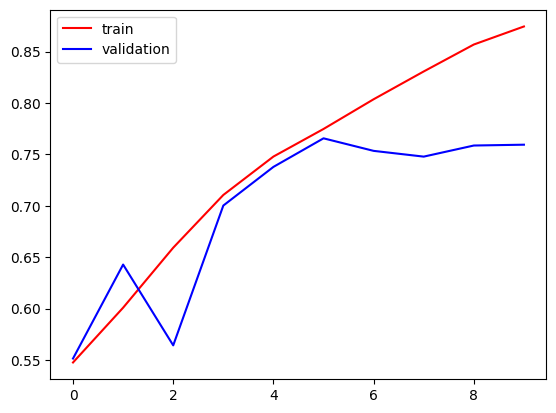

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [15]:
test_img = cv2.imread('/content/Dog.jpg')

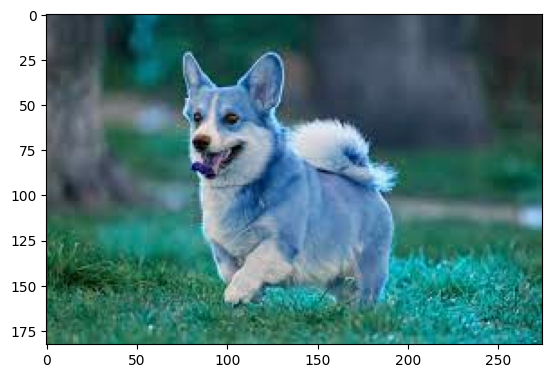

In [16]:
plt.imshow(test_img)

In [18]:
test_img.shape

(183, 275, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))

In [20]:
test_input = test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 [==============================] - 1s 572ms/step


array([[1.]], dtype=float32)

In [22]:
test_img = cv2.imread('/content/cat.jpg')

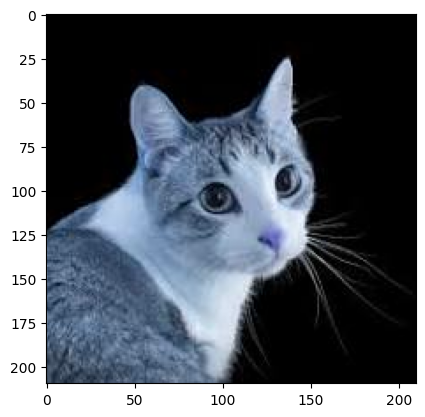

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape


(210, 210, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)